# The Sparks Foundation - *Graduate Rotational Internship Program*
## Data Science & Business Analytics Tasks

### *Task 6 : Prediction using Decision Tree Algorithm*
   #### Create the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly..
   
## AMIT A. KULKARNI

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

# Model Validation
from sklearn.model_selection import train_test_split

# Model Build
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Model Accuracy
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv("E:\TSF-Singapore\Task-6\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### So our Class Variable are of 3 types : 
- Versicolor
- Setosa
- Virginica

*All 3 classes have Equal Proportion of samples*

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Inferences:
- Data seems to be normally distributed as Mean and Median are having similar values for each Species
- Other than ID, all other column are float type
- There are No Null Values in the given data
- Data has 150 rows and  6 Columns

## 2. Data Visualization

### *2.1 Univariate Analysis*

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

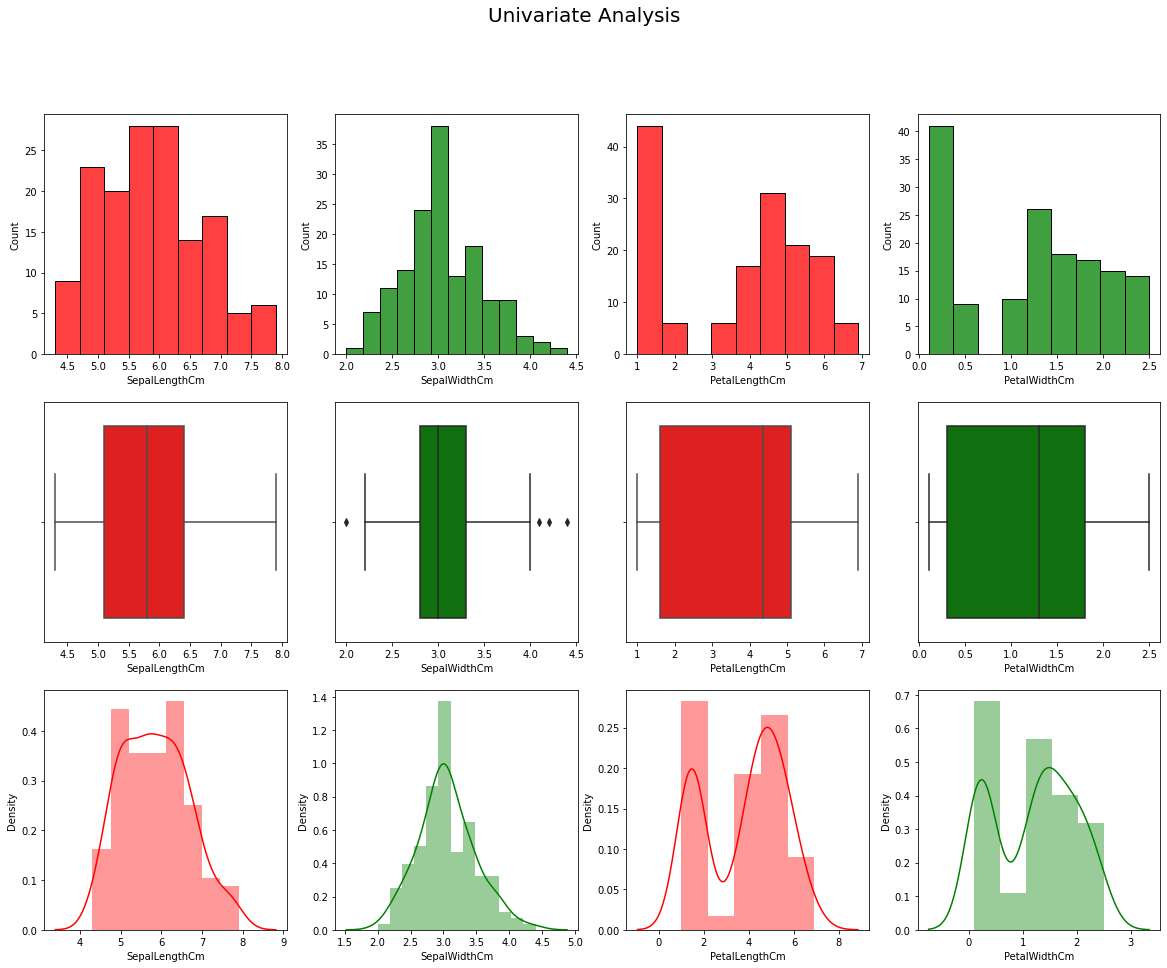

In [8]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3,4, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.histplot(x='SepalLengthCm',data=df,ax=axes[0,0],color='red')
sns.histplot(x='SepalWidthCm',data=df,ax=axes[0,1],color='green')
sns.histplot(x='PetalLengthCm',data=df,ax=axes[0,2],color='red')
sns.histplot(x='PetalWidthCm',data=df,ax=axes[0,3],color='green')
sns.boxplot(x='SepalLengthCm',data=df,ax=axes[1,0],color='red')
sns.boxplot(x='SepalWidthCm',data=df,ax=axes[1,1],color='green')
sns.boxplot(x='PetalLengthCm',data=df,ax=axes[1,2],color='red')
sns.boxplot(x='PetalWidthCm',data=df,ax=axes[1,3],color='green')
sns.distplot(df['SepalLengthCm'],ax=axes[2,0],color='red')
sns.distplot(df['SepalWidthCm'],ax=axes[2,1],color='green')
sns.distplot(df['PetalLengthCm'],ax=axes[2,2],color='red')
sns.distplot(df['PetalWidthCm'],ax=axes[2,3],color='green')

In [9]:
IQR_SL = stats.iqr(df['SepalLengthCm'], interpolation = 'midpoint')
IQR_SW = stats.iqr(df['SepalWidthCm'], interpolation = 'midpoint')
IQR_PL = stats.iqr(df['PetalLengthCm'], interpolation = 'midpoint')
IQR_PW = stats.iqr(df['PetalWidthCm'], interpolation = 'midpoint')
print('IQR of Sepal Length is ' + str(IQR_SL)+'\n' + 'IQR of Sepal Width is ' +str(IQR_SW)+'\n' + 'IQR of Petal Length is ' +str(IQR_PL)+'\n' + 'IQR of Petal Width is ' +str(IQR_PW))

IQR of Sepal Length is 1.3000000000000007
IQR of Sepal Width is 0.5
IQR of Petal Length is 3.4999999999999996
IQR of Petal Width is 1.5


In [10]:
df.skew(),df.kurtosis()

(Id               0.000000
 SepalLengthCm    0.314911
 SepalWidthCm     0.334053
 PetalLengthCm   -0.274464
 PetalWidthCm    -0.104997
 dtype: float64,
 Id              -1.200000
 SepalLengthCm   -0.552064
 SepalWidthCm     0.290781
 PetalLengthCm   -1.401921
 PetalWidthCm    -1.339754
 dtype: float64)

### Inferences:
- All the columns seems to be Normally Distributed
- There are 4 Outliers present in Sepal Width
- Most Sepal Length is 5.5 to 6.2 cm
- Most Sepal Width is 2.8 to 3.2 cm
- Most Petal Length is 1 cm
- Mostt Petal Width is 0.25 cm

### *2.2 Bivariate Analysis*

Text(0.5, 0.98, 'SL vs SW Plot')

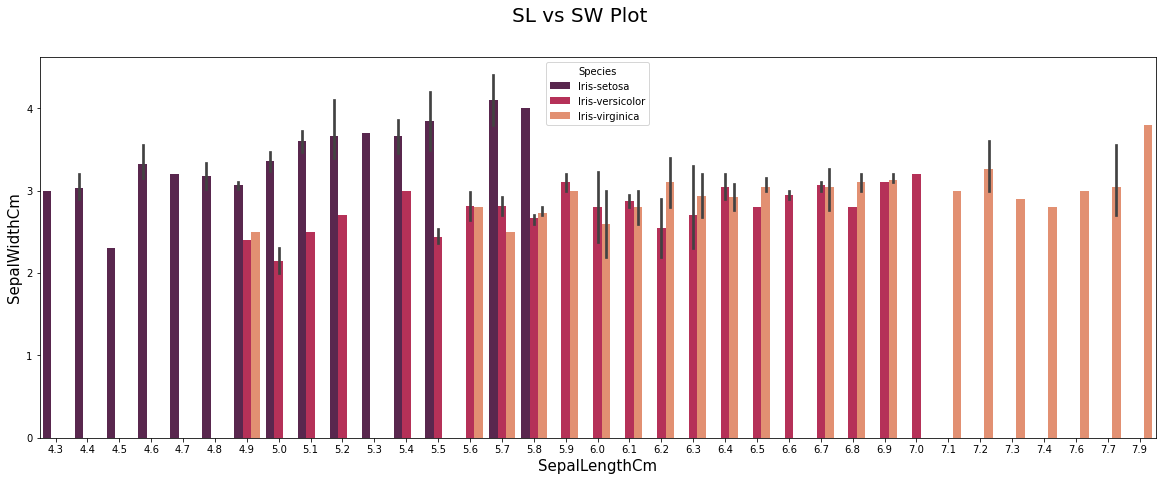

In [11]:
fig, axes = plt.subplots(figsize=(20, 7))
sns.barplot(x='SepalLengthCm',y='SepalWidthCm',data=df,axes=axes,hue='Species',palette='rocket')
plt.xlabel('SepalLengthCm',fontsize=15)
plt.ylabel('SepalWidthCm',fontsize=15)
plt.suptitle('SL vs SW Plot',fontsize=20)

Text(0.5, 0.98, 'PL vs PW Plot')

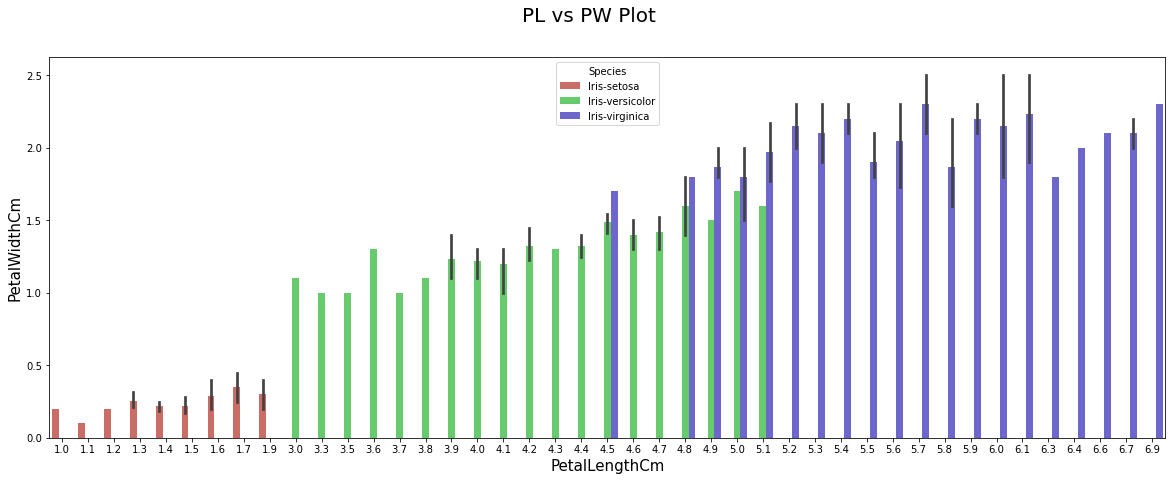

In [12]:
fig, axes = plt.subplots(figsize=(20, 7))
sns.barplot(x='PetalLengthCm',y='PetalWidthCm',data=df,axes=axes,hue='Species',palette='hls')
plt.xlabel('PetalLengthCm',fontsize=15)
plt.ylabel('PetalWidthCm',fontsize=15)
plt.suptitle('PL vs PW Plot',fontsize=20)

## 3. Label Encoding Target Column

In [13]:
label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df.iloc[:,-1])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [14]:
df['Species'].unique()

array([0, 1, 2])

### Inferences:
- Setosa Labelled as 0
- Versicolor Labelled as 1
- Viriginca Labelled as 2

## 4. Model Validation :  Train Test Split

In [15]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [17]:
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(2    0.333333
 1    0.333333
 0    0.333333
 Name: Species, dtype: float64,
 2    0.333333
 1    0.333333
 0    0.333333
 Name: Species, dtype: float64)

## 4. Performing Decision Tree Cassification

### 4.1 CART Technique (Default Criterion = Gini)

In [18]:
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
model1.score(X_train,y_train)

1.0

In [20]:
model1.score(X_test,y_test)

0.9333333333333333

#### As we can observe High Deviation is Train and Test Accuracy, we need to tune our Model Parameters

### 4.2 Manual Optimization

In [21]:
train_accuracy = []
test_accuracy = []
for depth in range(1,7):
    model1 = DecisionTreeClassifier(max_depth=depth,random_state=42)
    model1.fit(X_train,y_train)
    train_accuracy.append(model1.score(X_train,y_train))
    test_accuracy.append(model1.score(X_test,y_test))

In [22]:
Frame1 = pd.DataFrame({'max_depth':range(1,7),'Train Accuracy':train_accuracy,'Test Accuracy':test_accuracy})
Frame1

,max_depth,Train Accuracy,Test Accuracy
0,1,0.666667,0.666667
1,2,0.966667,0.933333
2,3,0.983333,0.966667
3,4,0.991667,0.933333
4,5,1.000000,0.933333
5,6,1.000000,0.933333


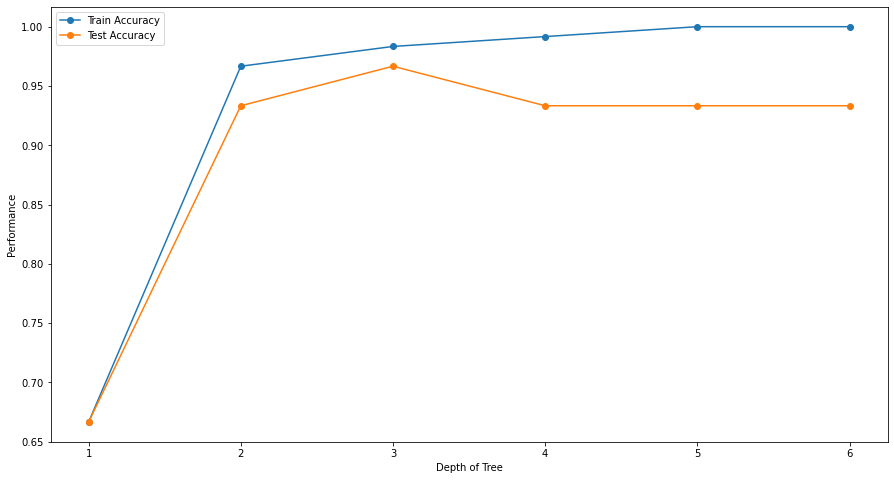

In [23]:
plt.figure(figsize=(15,8))
plt.plot(Frame1['max_depth'],Frame1['Train Accuracy'],marker = 'o')
plt.plot(Frame1['max_depth'],Frame1['Test Accuracy'],marker = 'o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
labels = ['Train Accuracy','Test Accuracy']
plt.legend(labels)

#### From this Graph, it seems max_depth = 3 is better as Train Accuracy = 98.33% and Test Accuracy = 96.67%

In [24]:
train_accuracy = []
test_accuracy = []
for node in range(2,10):
    model1 = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=node,random_state=42)
    model1.fit(X_train,y_train)
    train_accuracy.append(model1.score(X_train,y_train))
    test_accuracy.append(model1.score(X_test,y_test))

In [25]:
Frame2 = pd.DataFrame({'max_leaf_nodes':range(2,10),'Train Accuracy':train_accuracy,'Test Accuracy':test_accuracy})
Frame2

,max_leaf_nodes,Train Accuracy,Test Accuracy
0,2,0.666667,0.666667
1,3,0.966667,0.933333
2,4,0.983333,0.966667
3,5,0.983333,0.966667
4,6,0.983333,0.966667
5,7,0.983333,0.966667
6,8,0.983333,0.966667
7,9,0.983333,0.966667


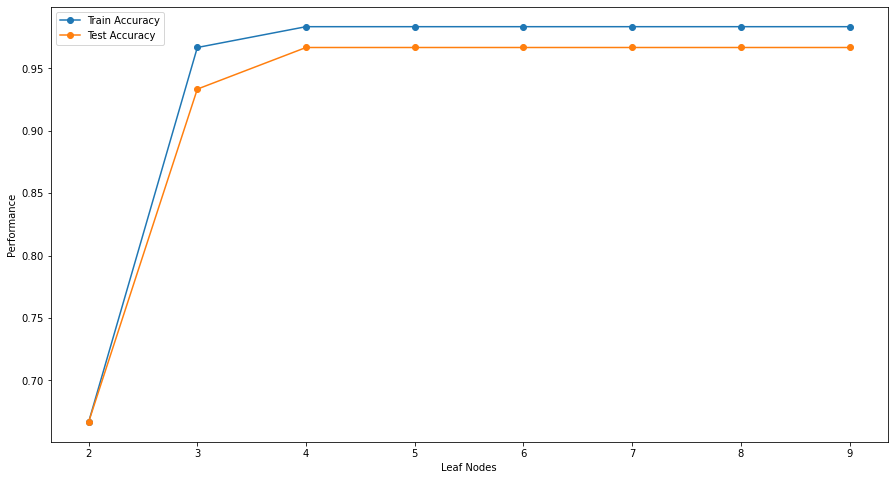

In [26]:
plt.figure(figsize=(15,8))
plt.plot(Frame2['max_leaf_nodes'],Frame2['Train Accuracy'],marker = 'o')
plt.plot(Frame2['max_leaf_nodes'],Frame2['Test Accuracy'],marker = 'o')
plt.xlabel('Leaf Nodes')
plt.ylabel('Performance')
labels = ['Train Accuracy','Test Accuracy']
plt.legend(labels)

#### From this Graph, it seems max_leaf_nodes = 4 is better as Train Accuracy = 98.33% and Test Accuracy = 96.67%

### 4.3 Remodel with Tuned Parameters

In [27]:
final_model = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=4,random_state=4)
final_model.fit(X_train,y_train)
final_model.score(X_train,y_train)

0.9833333333333333

In [28]:
final_model.score(X_test,y_test)

0.9666666666666667

### 4.4 Decion Tree Visualization

[Text(133.92000000000002, 190.26, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(133.92000000000002, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]')]

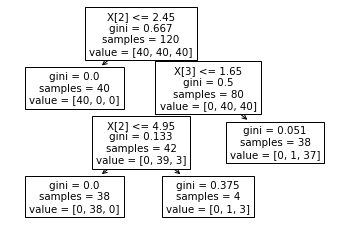

In [29]:
tree.plot_tree(final_model)

[Text(744.0, 1585.5, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = Setosa'),
 Text(372.0, 1132.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Setosa'),
 Text(1116.0, 1132.5, 'PetalWidthCm <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = Versicolor'),
 Text(744.0, 679.5, 'PetalLengthCm <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = Versicolor'),
 Text(372.0, 226.5, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = Versicolor'),
 Text(1116.0, 226.5, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(1488.0, 679.5, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = Virginica')]

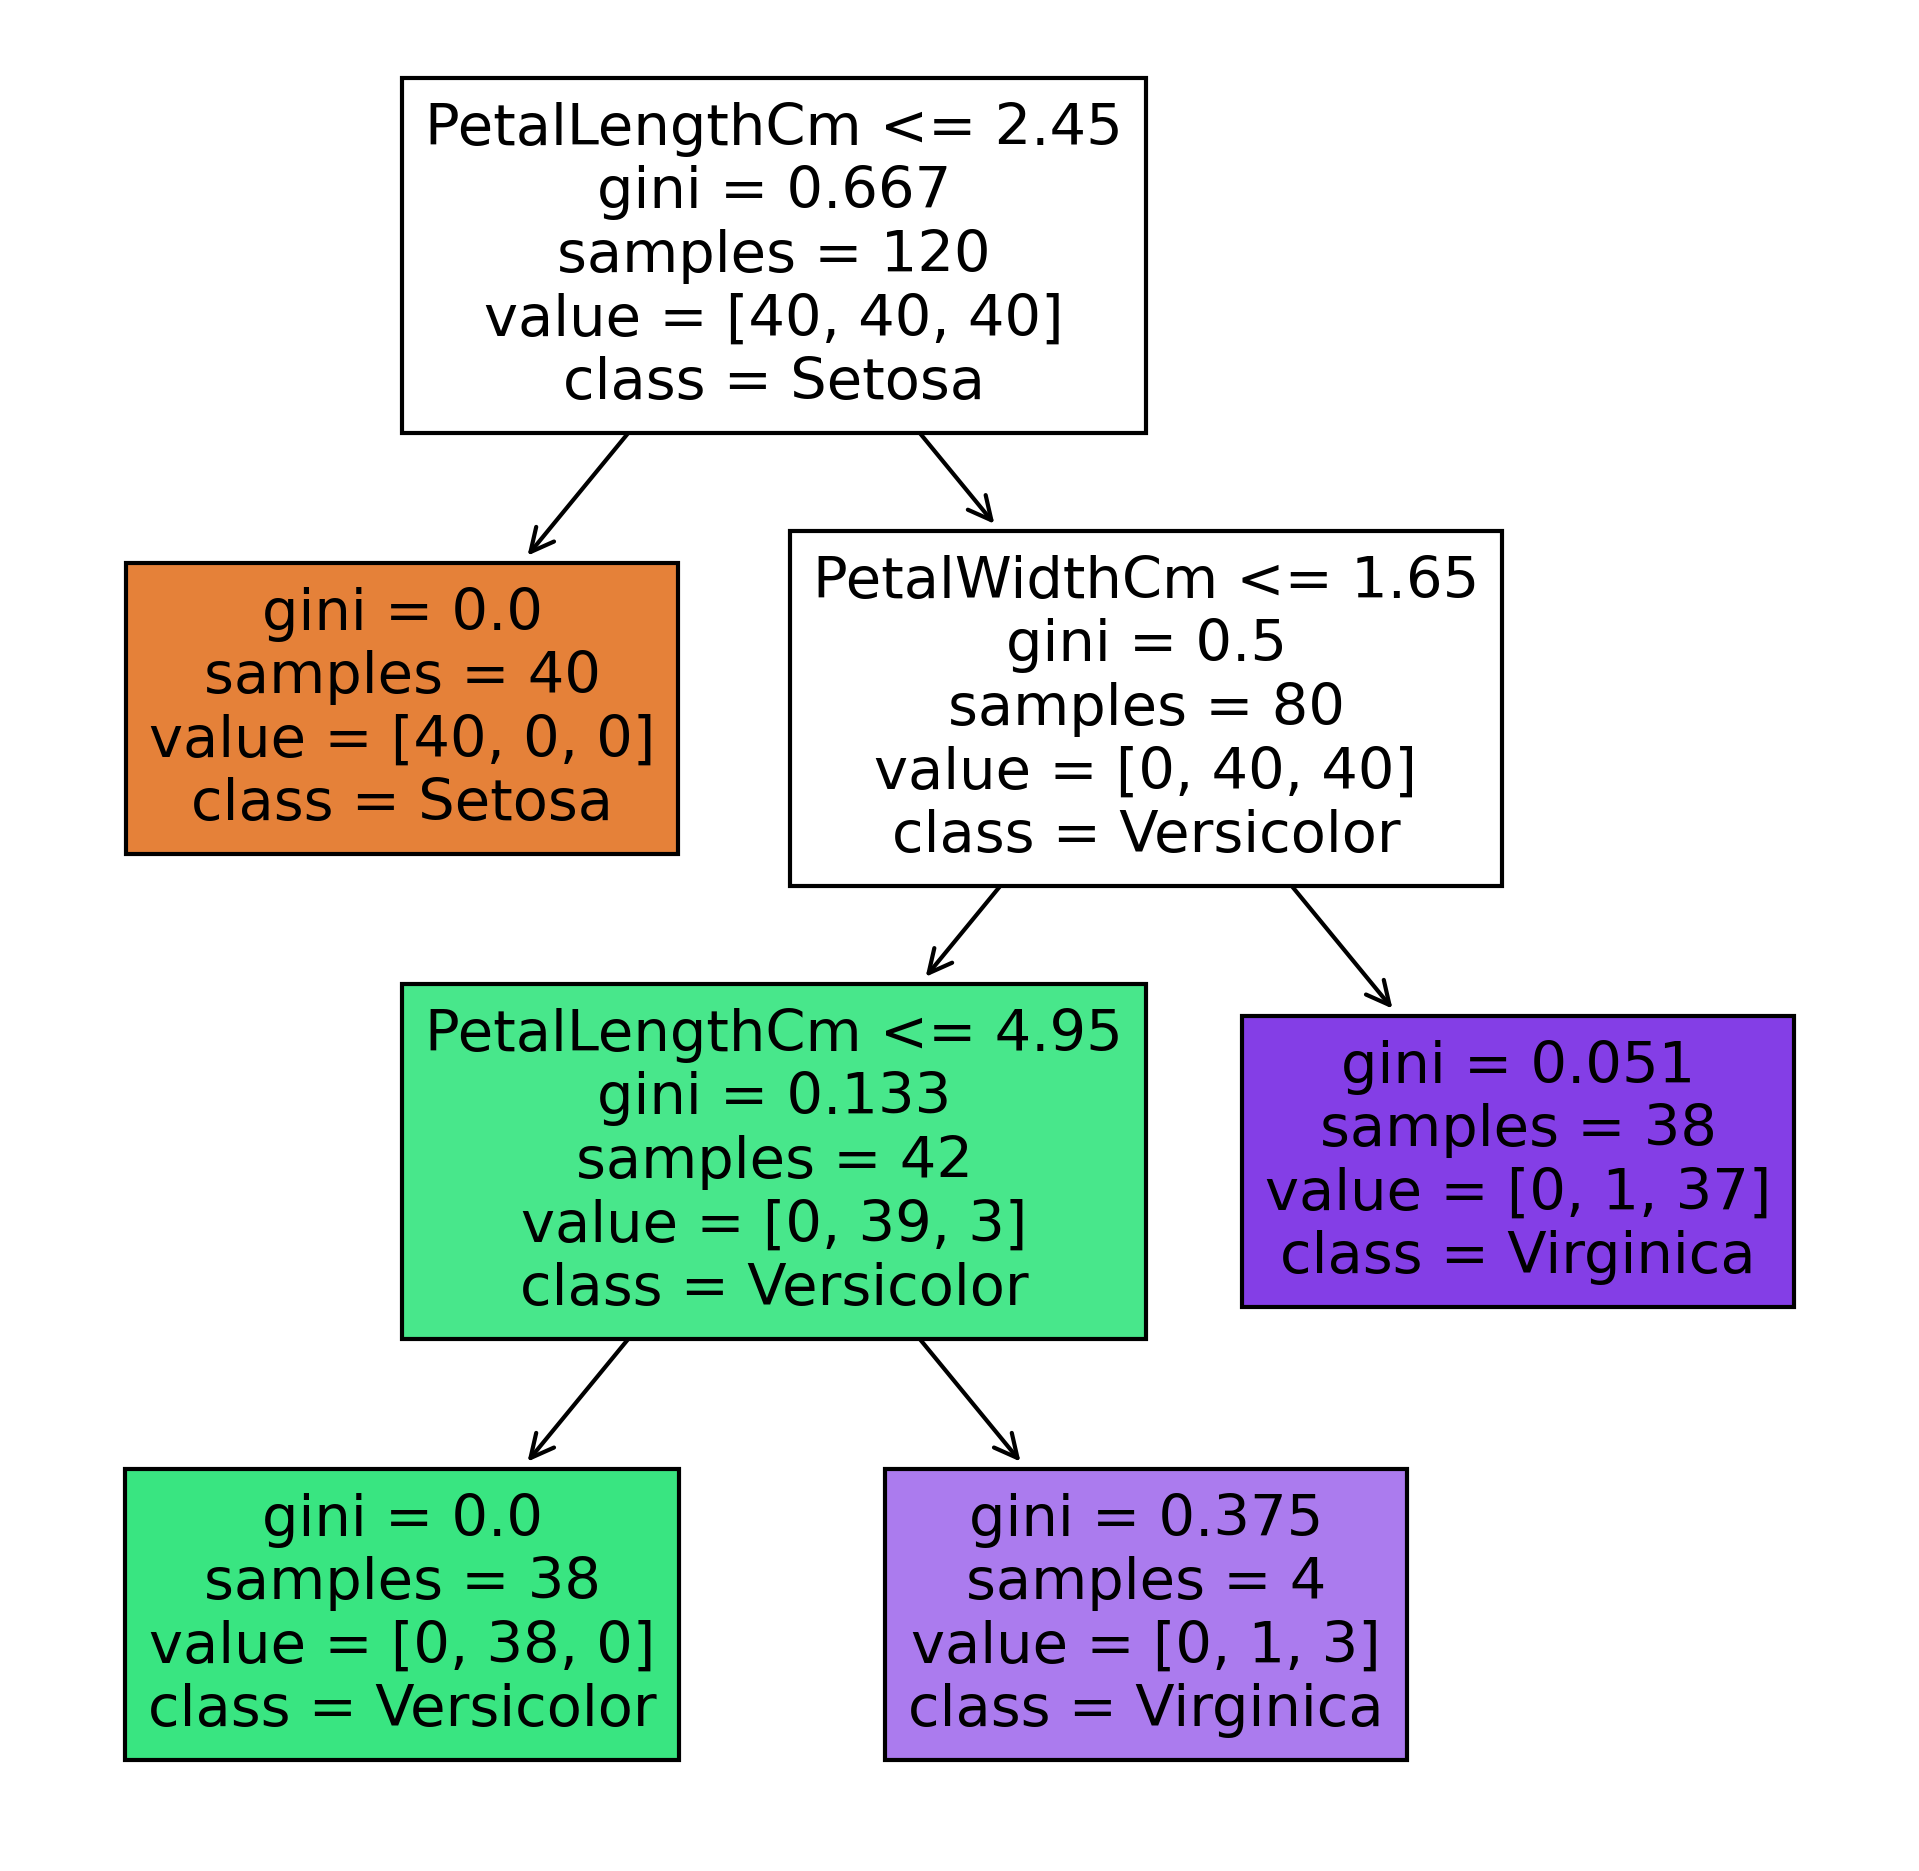

In [30]:
a = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
b = ['Setosa','Versicolor','Virginica']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
tree.plot_tree(final_model,feature_names=a,class_names=b,filled=True)

In [31]:
pred = final_model.predict(X_test)
pd.crosstab(y_test,pred)

col_0,0,1,2
Species,,,
0,10,0,0
1,0,9,1
2,0,0,10


### 4.5 Auto Optimization

In [39]:
from sklearn.model_selection import GridSearchCV
model2 = DecisionTreeClassifier(random_state=42)
a = [2,3,4,5,6,7,8,9,10]
parameter = [{'max_depth':a,'max_leaf_nodes':a,'min_samples_split':a,'min_samples_leaf':a,'criterion':['gini','entropy']}]

In [40]:
gmodel = GridSearchCV(model2,parameter)
gmodel.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}])

In [41]:
gmodel.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

### 4.6 Rebuild Model with Best Parameters

In [42]:
model3 = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=4,min_samples_leaf=2,min_samples_split=2,random_state=42)
model3.fit(X_train,y_train)
model3.score(X_train,y_train)

0.9833333333333333

In [43]:
model3.score(X_test,y_test)

0.9666666666666667